In [79]:
from qiskit_aer import Aer
from qiskit import * 
from qiskit.visualization import * 
import matplotlib.pyplot as plt
import math

In [80]:
marked_state  = "0110"  #шуканий елемент 
n = len(marked_state )  

In [81]:
def grover_oracle(marked_state):
    qc = QuantumCircuit(n)
    
    # Інверсія бітів, де у marked_state стоїть 0
    for i, bit in enumerate(marked_state[::-1]):
        if bit == "0":
            qc.x(i)
    
    # Багатокерований Z
    qc.h(n-1)
    qc.mcx(list(range(n-1)), n-1)
    qc.h(n-1)
    
    # Повернення інверсій
    for i, bit in enumerate(marked_state[::-1]):
        if bit == "0":
            qc.x(i)
    
    return qc

In [82]:
def diffuser():
    qc = QuantumCircuit(n)
    
    qc.h(range(n))
    qc.x(range(n))
    
    qc.h(n-1)
    qc.mcx(list(range(n-1)), n-1)
    qc.h(n-1)
    
    qc.x(range(n))
    qc.h(range(n))
    
    return qc

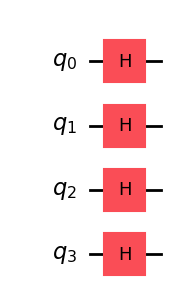

In [83]:
qc = QuantumCircuit(n)

#суперпозиція
qc.h(range(n))
qc.draw(output="mpl")

In [84]:
#застосування оракула
oracle = grover_oracle(marked_state)

#застосування дифузора
diff = diffuser()

#повторення ітерацій Гровера
N = 2**n
optimal_iterations = math.floor((math.pi / 4) * math.sqrt(N))
print("Оптимальна кількість ітерацій:", optimal_iterations)

for _ in range(optimal_iterations):
    qc.compose(oracle, inplace=True)
    qc.compose(diff, inplace=True)

Оптимальна кількість ітерацій: 3


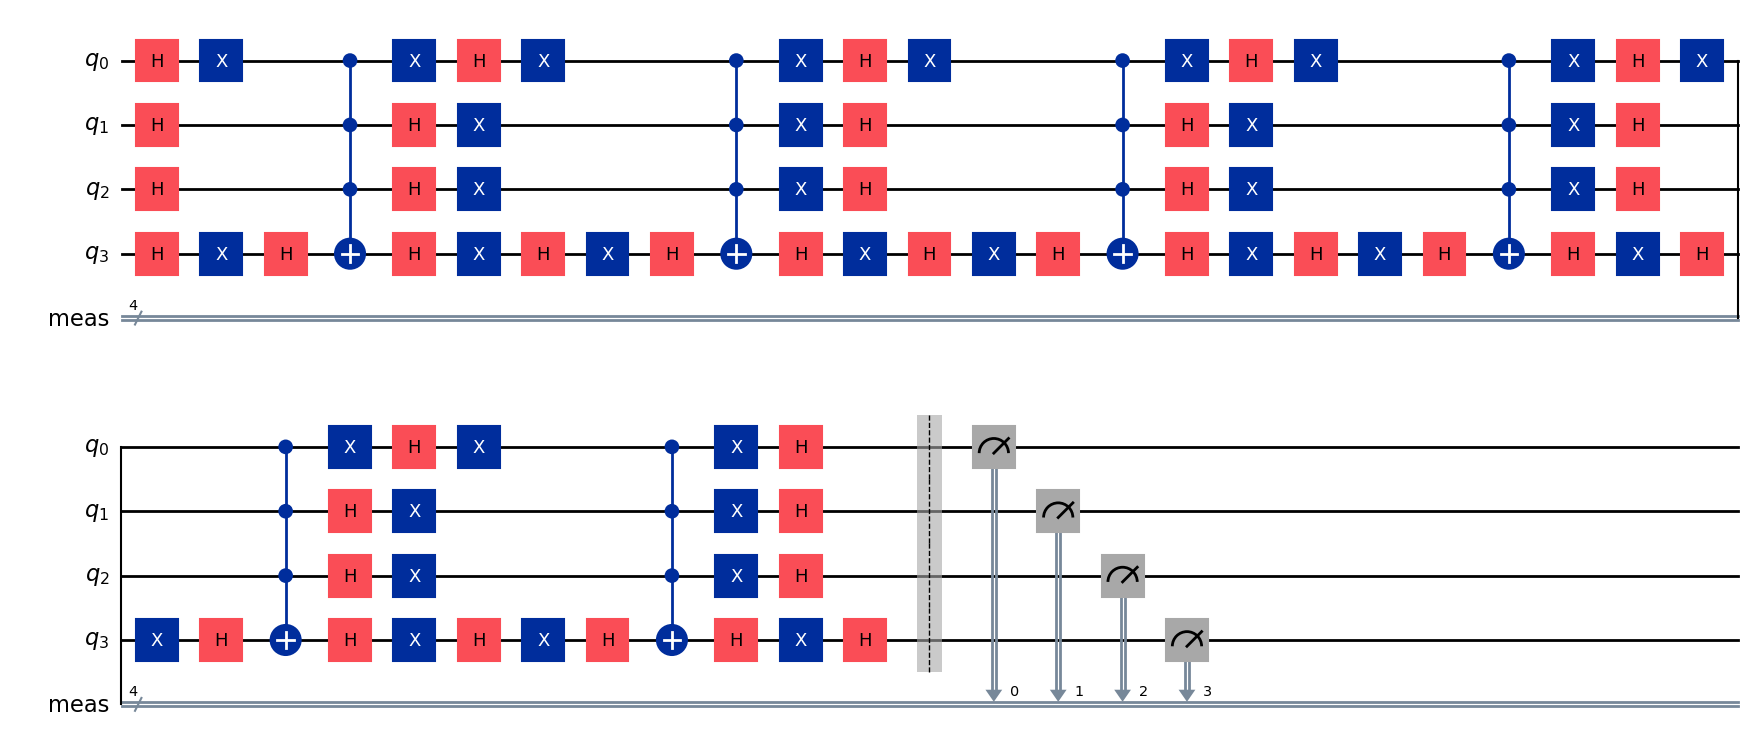

In [85]:
qc.measure_all()
qc.draw(output="mpl")

Результати вимірювання: {'0110': 977, '1110': 6, '0101': 7, '1000': 4, '1001': 2, '0001': 4, '1100': 2, '0010': 3, '0111': 4, '1101': 2, '0011': 3, '0000': 2, '1011': 3, '1111': 3, '1010': 1, '0100': 1}


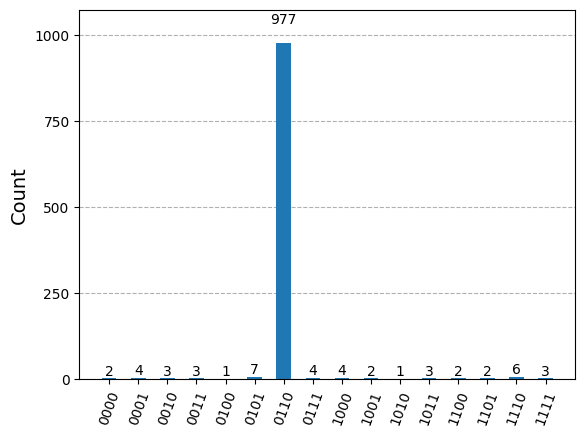

In [86]:
sim = Aer.get_backend('aer_simulator')
compiled_circuit = transpile(qc, sim)
result = sim.run(compiled_circuit, shots=1024).result()
counts = result.get_counts()
print("Результати вимірювання:", counts)
plot_histogram(counts)